# <center> Module 1 

Group: <br>
Darko Petrov <br>
Alexander Lendon

### <center> Q1. Gaussian Models.

#### 1
a)
$$
- log L(\mu, \sigma^2, X) = \frac{n}{2} log (2\pi) + \frac{n}{2} log (\sigma^2) + \frac{1}{2 \sigma^2} \sum^n_{i=1}(X_i-\mu)^2
$$

b) 
for $\mu$
$$
\frac{d}{d\mu} - log L(\mu, \sigma, X) = \frac{1}{2 \sigma^2} \sum^n_{i=1}2(X_i-\mu)
$$

for $\sigma^2$
$$
\frac{d}{d\sigma} - log L(\mu, \sigma, X) = \frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^n_{i=1}(X_i-\mu)^2
$$

c) For a test in a class room $\mu$ is the mean result of the students. Two factors drive this variable, the difficulty of the test and the preparedness of the students. A more diffcult test a lower mean is suited. Similarly lower preparedness of students would also suit a lower mean value.

The variance of results is denoted by $\sigma$, this indicates the spread of the results. For a difficult test or student group with diverse abilities a larger variance would be suitable. A small sigma value would be suitable for easier test and with good student preparation or similar abilities.

#### 2
a)


In [2]:
import pandas
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# We will be using the sklearn library. You can learn more here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# Loading the data
data0=pandas.read_csv('Real estate.csv')
npdata=data0.to_numpy()

# Divide the data to the variables and the label (price)
# The Ridge class does not admit an intercept (i.e. mu in the assignment) you should
# add a suitable column to your variables that will provide an extra parameter
# i.e. mu. Think what this column should be

# Now run ridge regression. Note that in the ridge classe mu is known as alpha.
#Setting alph=0 gives you the maximum likelihood solution. 
# You should try really large values of alpha to see the difference

# print(npdata)
X = npdata[:, :-1]  
y = npdata[:, -1]   
X = np.column_stack((np.ones(X.shape[0]), X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

alpha_values = np.linspace(1e-10,100000,100000)
ridge_models = {}
ridge_mse = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_models[alpha] = ridge_model
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)


C:\Users\darko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.03287e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


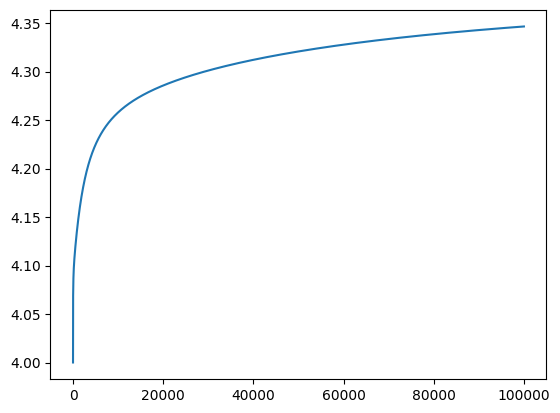

In [3]:
import matplotlib.pyplot as plt
# for a, b in zip(alpha_values, ridge_mse):
#     print("For Appha = ",a, "MSE=", b)
    
plt.plot(alpha_values,np.log(ridge_mse))